In [2]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 145.2 kB/s eta 0:17:13
   ---------------------------------------- 0.1/150.0 MB 233.8 kB/s eta 0:10:42
   ---------------------------------------- 0.3/150.0 MB 1.0 MB/s eta 0:02:25
   ---------------------------------------- 0.8/150.0 MB 2.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [4]:
# Assuming the dataset is downloaded and saved as 'creditcard.csv'
df = pd.read_csv(r"C:\Users\coolt\Downloads\archive (1)\creditcard.csv")

In [5]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (284807, 31)


In [6]:
# Display the first few rows
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
# Summary statistics
print("Summary statistics:\n", df.describe())

Summary statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

In [9]:
# Distribution of the target variable
print("Class distribution:\n", df['Class'].value_counts(normalize=True))

Class distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


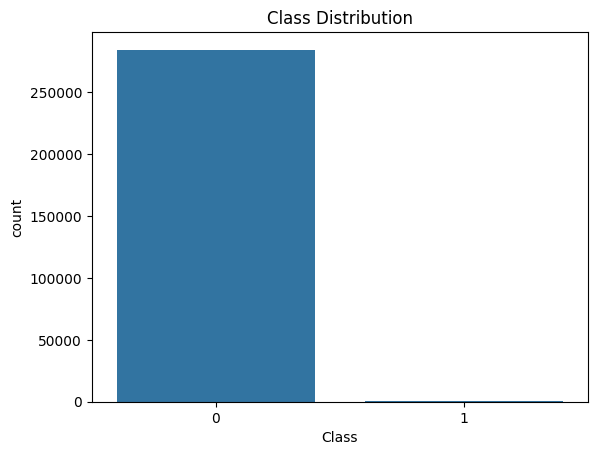

In [10]:
# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

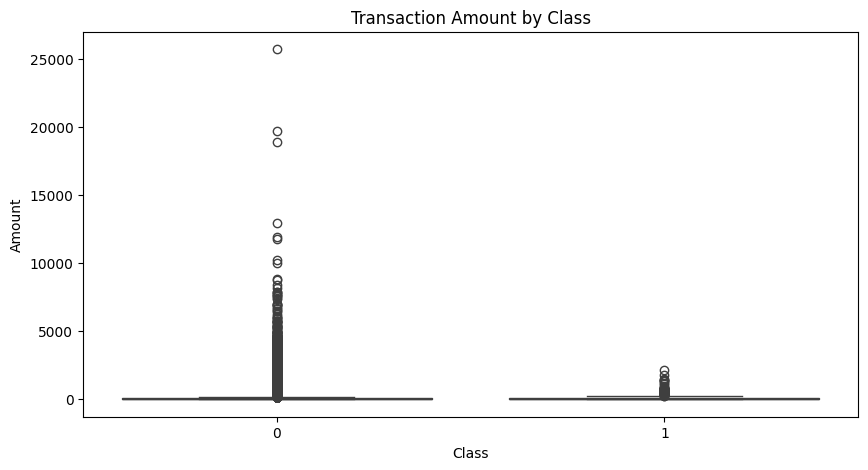

In [11]:
# Visualize the distribution of Amount for fraud and non-fraud transactions
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

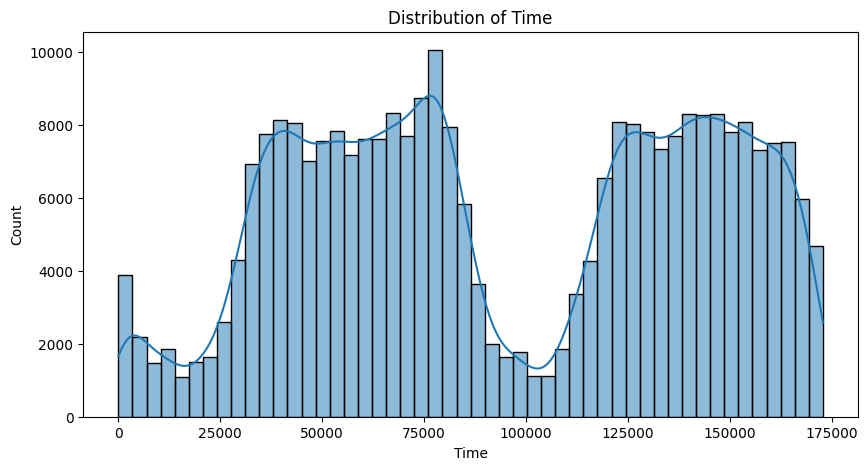

In [12]:
# Visualize the distribution of Time
plt.figure(figsize=(10, 5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Time')
plt.show()

In [16]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Scale all features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

We use StandardScaler to scale all features to have a mean of 0 and a standard deviation of 1.
This ensures that all features contribute equally to the model.

-: Split the Data
We split the dataset into training and testing sets while maintaining the class distribution using stratification.

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Explanation:

test_size=0.2: 20% of the data is used for testing.
stratify=y: Ensures the same proportion of fraud and non-fraud transactions in both sets.
random_state=42: For reproducibility.

-: Train Models
We train three models: Logistic Regression, Random Forest, and XGBoost. Since the dataset is imbalanced, we use class weights or equivalent techniques to handle this.

In [19]:
# Logistic Regression with class weights
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

# Random Forest with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# XGBoost with scale_pos_weight (ratio of negative to positive samples)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Explanation:

Logistic Regression: Uses class_weight='balanced' to give more weight to the minority class (fraud).
Random Forest: Also uses class_weight='balanced'.
XGBoost: Uses scale_pos_weight to adjust for imbalance, calculated as the ratio of negative to positive samples.

-: Evaluate Models
We evaluate each model using metrics suitable for imbalanced datasets:

Classification Report: Precision, Recall, F1-score for the fraud class.
AUC-ROC: Area Under the Receiver Operating Characteristic curve (higher is better).
Confusion Matrix: To visualize true positives, false positives, etc.

Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

AUC-ROC: 0.9720887035877941


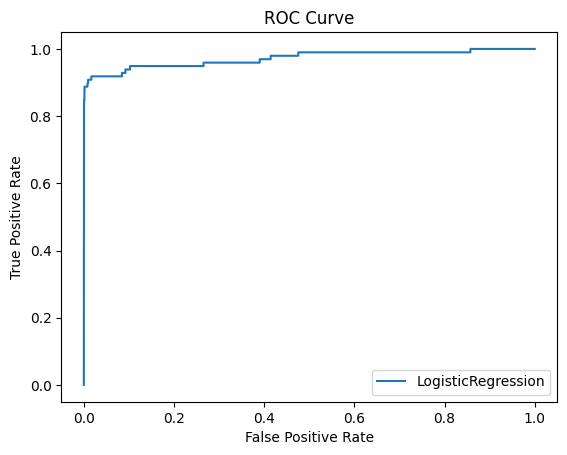

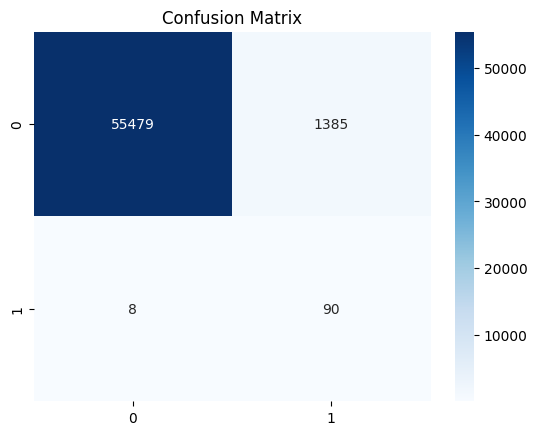

Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC: 0.9529092148254912


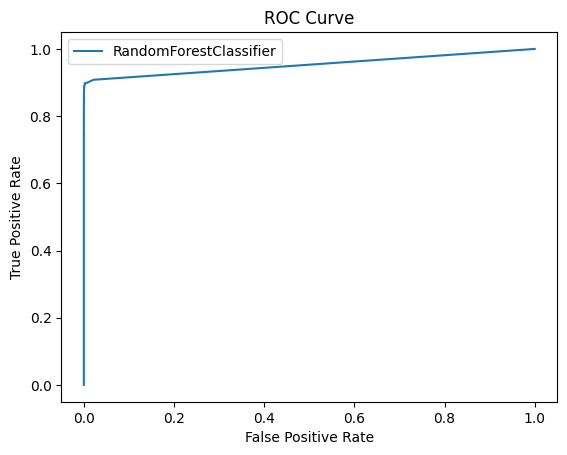

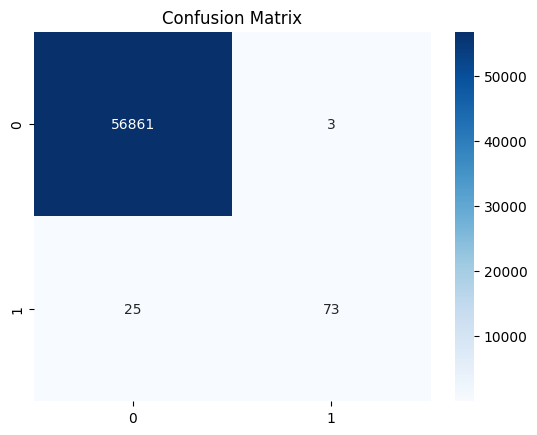

XGBoost:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC: 0.9682378578893572


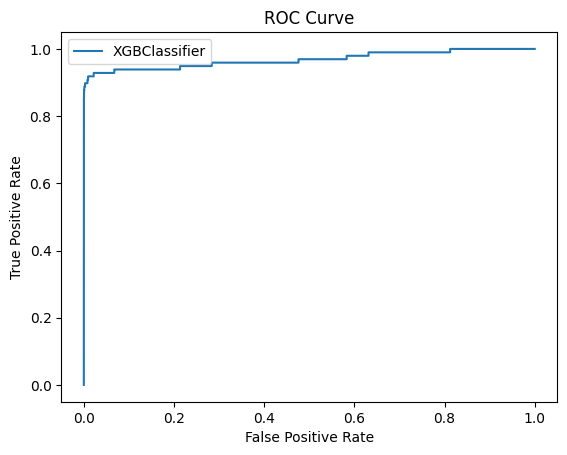

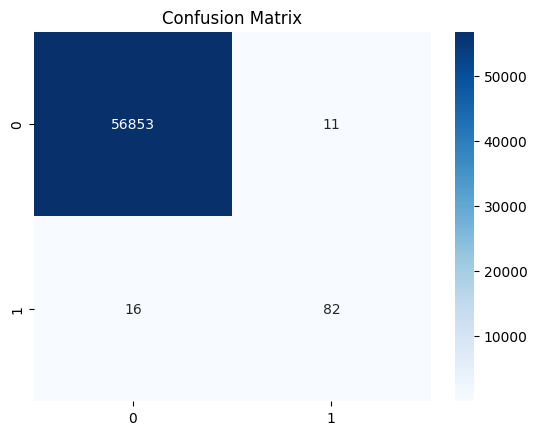

In [21]:
# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=model.__class__.__name__)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate each model
print("Logistic Regression:")
evaluate_model(logreg, X_test, y_test)

print("Random Forest:")
evaluate_model(rf, X_test, y_test)

print("XGBoost:")
evaluate_model(xgb, X_test, y_test)

Step 9: Feature Importance
For tree-based models like Random Forest and XGBoost, we can extract feature importance to understand which features are most indicative of fraud.

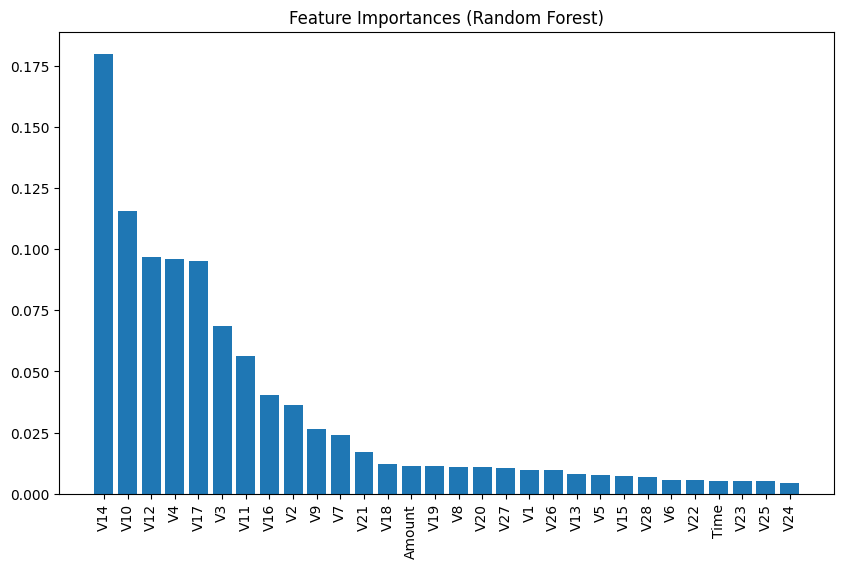

In [22]:
# Feature importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

Explanation:

This plot shows which of the 30 features (V1-V28, Time, Amount) are most important for detecting fraud.
Since V1-V28 are PCA components, they are not directly interpretable, but we can still identify which components contribute most.